In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras import Model
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [17]:
df = pd.read_csv("E:\\datasets\\anemia.csv")

In [18]:
features = ['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']
df['data'] = df[features].values.tolist()

df['target'] = df['Anaemic']
df = df[['data', 'target']]

df['target'] = LabelEncoder().fit_transform(df['target'])  # Yes = 1, No = 0

df['data'] = df['data'].apply(lambda row: [1 if str(feature).strip() == 'M' else 0 if str(feature).strip() == 'F' else feature for feature in row])

df

,data,target
0,"[1, 43.2555, 30.8421, 25.9025, 6.3]",1
1,"[0, 45.6033, 28.19, 26.2067, 13.5]",0
2,"[0, 45.0107, 28.9677, 26.0215, 11.7]",0
3,"[0, 44.5398, 28.9899, 26.4703, 13.5]",0
4,"[1, 43.287, 30.6972, 26.0158, 12.4]",0
...,...,...
99,"[0, 49.9999, 29.286, 20.7141, 14.5]",1
100,"[1, 42.2324, 30.6757, 27.0919, 6.3]",1
101,"[0, 45.6064, 31.9084, 22.4852, 12.7]",0
102,"[1, 45.2095, 29.2769, 25.5136, 13.4]",0


In [19]:
X = np.array(df['data'].tolist())
y = np.array(df['target'].tolist())

num_features = X.shape[1]

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [22]:
input_layer = Input(shape=(num_features, ))
linear_neuron=Dense(1,activation='linear')(input_layer)

adaline= Model(inputs=[input_layer], outputs=[linear_neuron])
adaline.compile(optimizer='sgd',loss='mae')

In [31]:
adaline.fit(X_train, y_train, epochs=100, batch_size=X_train.shape[0], validation_split=0.3, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - loss: 0.3350 - val_loss: 0.2456
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.3327 - val_loss: 0.2428
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.3306 - val_loss: 0.2400
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3286 - val_loss: 0.2372
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.3265 - val_loss: 0.2344
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3245 - val_loss: 0.2316
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.3224 - val_loss: 0.2288
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3204 - val_loss: 0.2262
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.3185 - val_loss: 0.2238
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.3169 - val_loss: 0.2221
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.3156 - val_loss: 0.2210
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.3143 - val_l

In [32]:
y_pred = adaline.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [33]:
y_pred_classes = (y_pred > 0.5).astype(int).flatten()
y_true = y_test

In [34]:
class_report = classification_report(y_true, y_pred_classes, target_names=["Class 0", "Class 1"])

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.96      0.98        25
     Class 1       0.88      1.00      0.93         7

    accuracy                           0.97        32
   macro avg       0.94      0.98      0.96        32
weighted avg       0.97      0.97      0.97        32



In [35]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)

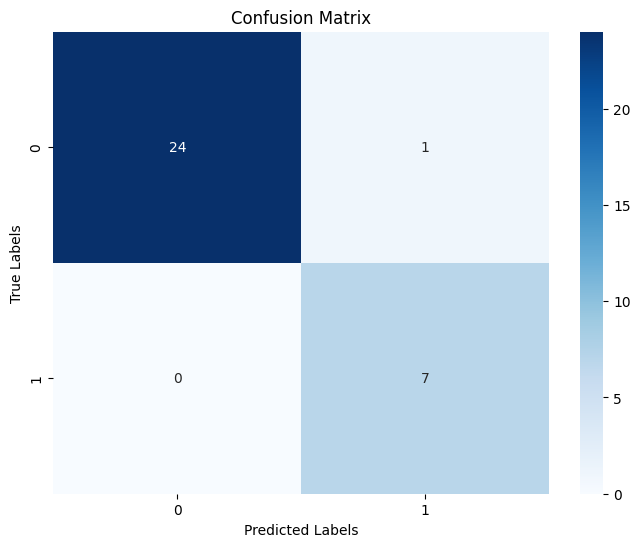

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
class_report = classification_report(y_true, y_pred_classes, target_names=["Class 0", "Class 1"])

print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.96      0.98        25
     Class 1       0.88      1.00      0.93         7

    accuracy                           0.97        32
   macro avg       0.94      0.98      0.96        32
weighted avg       0.97      0.97      0.97        32



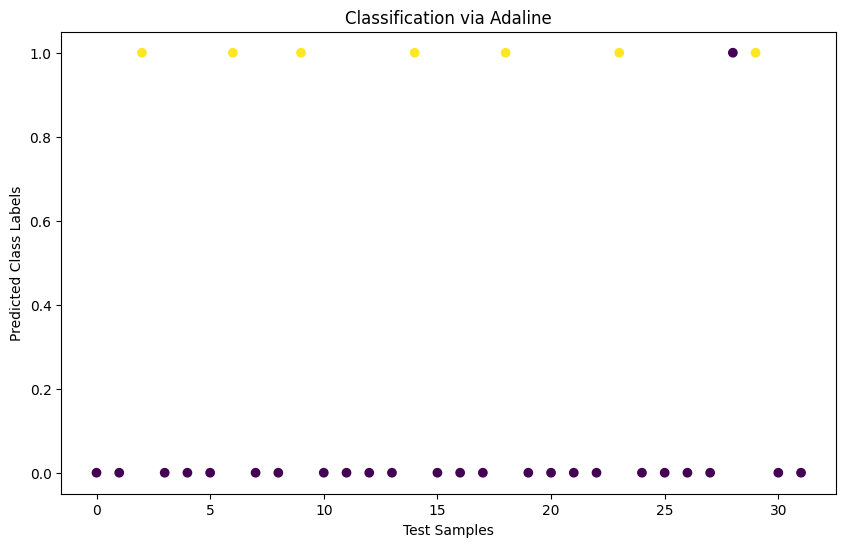

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred)), y_pred_classes, c=y_test, cmap='viridis', marker='o', label='Predicted Class')
plt.xlabel('Test Samples')
plt.ylabel('Predicted Class Labels')
plt.title('Classification via Adaline')
plt.show()